<header style="width:100%;position:relative">
  <div style="width:80%;float:right;">
    <h1>Challenge Loan Approval Prediction in Pennsylvania</h1>
    <h3>Visualización de los datos</h3>
    <h5>Grupo 2</h5>
  </div>
        <img style="width:15%;" src="./images/logo.jpg" alt="UPM" />
</header>

# Índice

1. [Importar librerias](#1.-Importar-librerias)  
2. [Analizar la distribución](#2.-Analizar-la-distribucion)  
3. [Scatterplot](#3.-Scatterplot)  
4. [Relación entre datos](#4.-Relacion-entre-datos)  

# 1. Importar librerias

In [83]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

df = pd.read_csv('formated/train_exportado.csv')

# 2. Analizar la distribucion

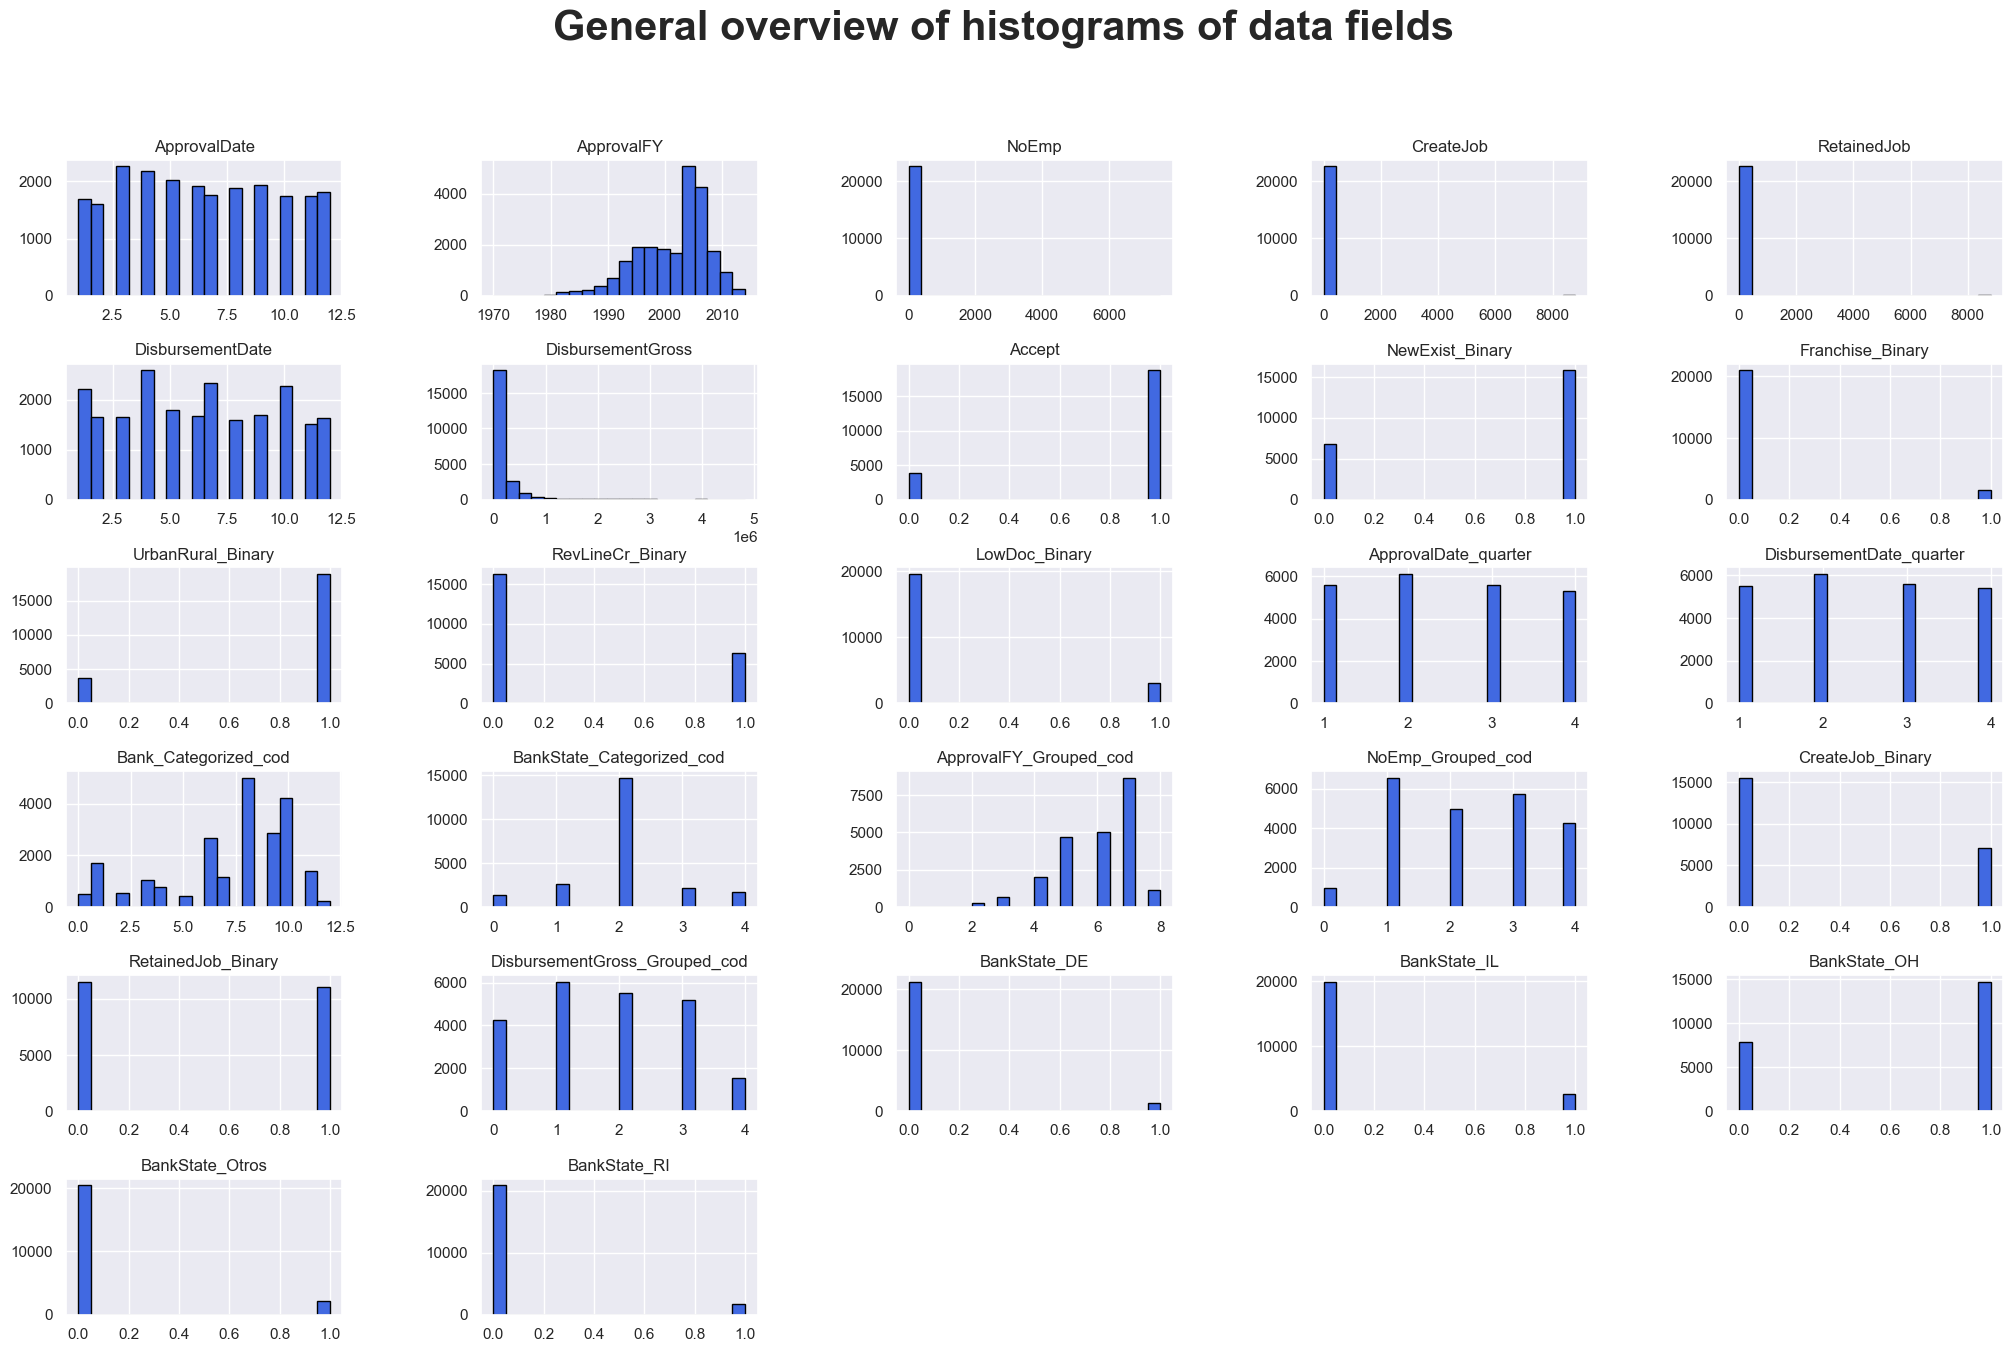

In [6]:
df.hist(figsize=(25, 15), bins=20, color="royalblue", edgecolor="black")
plt.suptitle("General overview of histograms of data fields", fontsize=30, fontweight="bold")
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
plt.show()


Varias distribuciones, como «DisbursementGross» y «ApprovalFY», muestran asimetría, lo que indica que la mayoría de los valores se concentran en el extremo inferior y que hay unos pocos valores extremadamente altos. Las variables binarias, como UrbanRural_Binary, RevLineCr_Binary y LowDoc_Binary, muestran un claro predominio de una categoría sobre otra, lo que sugiere distribuciones desequilibradas. «NoEmp» y «CreateJob» presentan distribuciones muy dispersas, en las que la mayoría de los valores se concentran en los valores más bajos, pero con valores atípicos en los valores más altos. Las variables categóricas agrupadas, como «ApprovalFY_Grouped_cod» y «DisbursementGross_Grouped_cod», muestran una distribución más homogénea entre categorías, pero con ciertos intervalos más poblados que otros. Algunas características, como «Bank_Categorized_cod», revelan una distribución multimodal, lo que sugiere la existencia de distintos subgrupos dentro de los datos.

# 3. Scatterplot

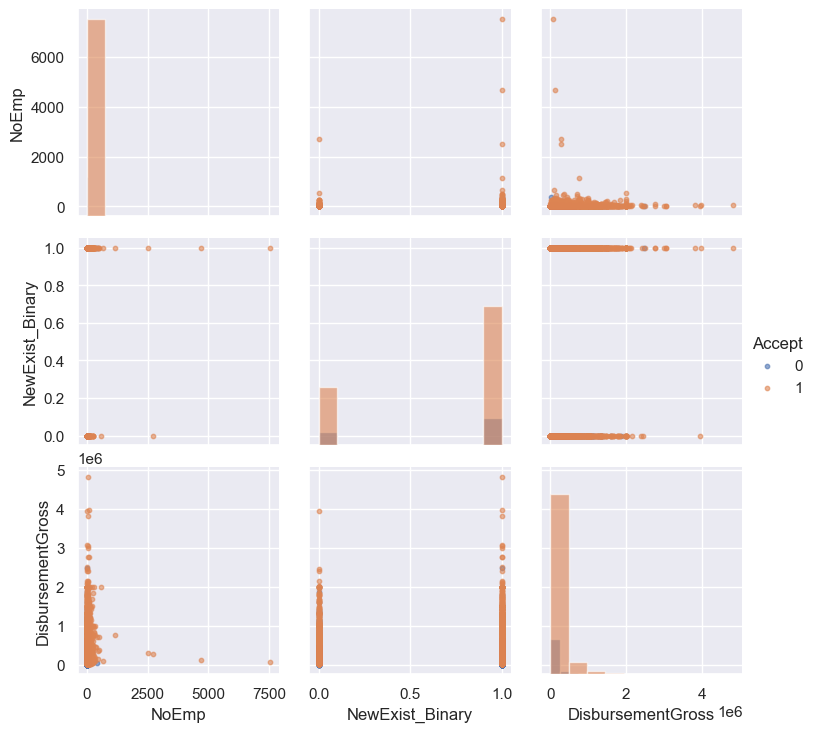

In [64]:

df_sorted = df.sort_values(by="Accept", ascending=True)
g = sns.PairGrid(df_sorted, hue="Accept", vars=['NoEmp', 'NewExist_Binary', 'DisbursementGross'])
g.map_diag(plt.hist, alpha=0.6) 
g.map_offdiag(plt.scatter, alpha=0.6, s=10)  
g.add_legend()

A simple vista, no se aprecian correlaciones lineales fuertes en este conjunto de datos.
La tendencia principal es que un mayor número de empleos (NoEmp) está ligeramente relacionado con un mayor desembolso de préstamos (DisbursementGross).
La aceptación parece bastante heterogénea en todas las características, lo que indica que otros factores invisibles pueden desempeñar un papel más importante en la concesión de los préstamos.

# 4. Relacion entre datos

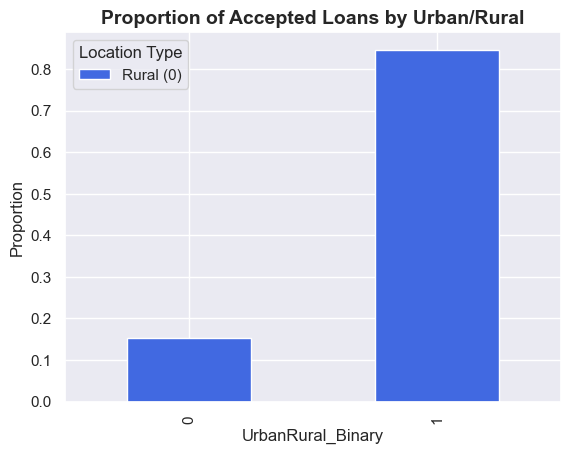

In [65]:
ax = (df.query('Accept == 1')
        .groupby(['UrbanRural_Binary'])
        .size() / len(df.query('Accept == 1'))
     ).plot(kind='bar', color=['royalblue'])

plt.xlabel("UrbanRural_Binary", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.title("Proportion of Accepted Loans by Urban/Rural", fontsize=14, fontweight="bold")

legend_labels = ["Rural (0)", "Urban (1)"]
ax.legend(legend_labels, title="Location Type")
plt.show()


Podemos ver que hay más solicitudes de préstamo aceptadas en las zonas urbanas que en las rurales.

Ahora analizamos la relación entre "Accept" y "DisbursementGross"

/Users/lhaemmerli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


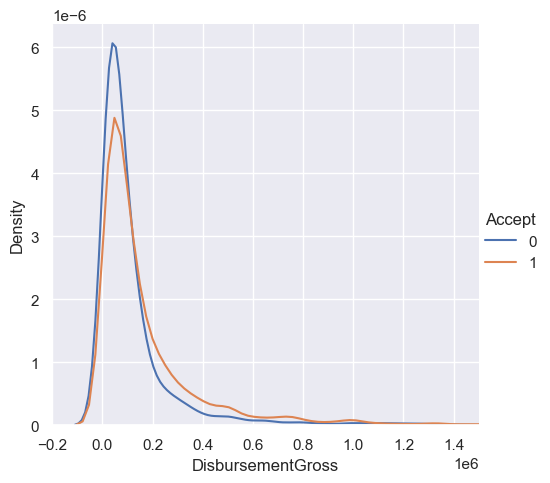

In [66]:
g = sns.FacetGrid(df, hue="Accept", height=5)
g.map(sns.kdeplot, "DisbursementGross")
plt.xlim(-0.2e6, 1.5*1e6)
g.add_legend()

plt.show()


No observamos diferencias significativas.
Ahora analizamos la relación entre "Accept" y "NoEmp"

/Users/lhaemmerli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(-100.0, 100.0)

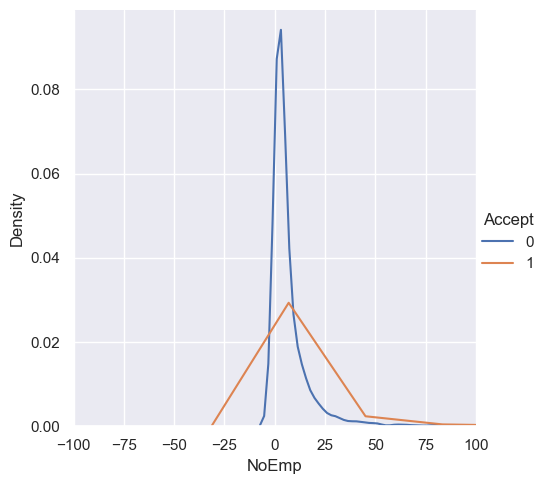

In [67]:
sns.FacetGrid(df, hue="Accept", height=5).map(sns.kdeplot, "NoEmp").add_legend()
plt.xlim(-100, 100)

Las curvas para Accept = 0 y Accept = 1 son muy diferentes y esto sugiere que el estado de aceptación esta influenciada por la variable "NoEmp".

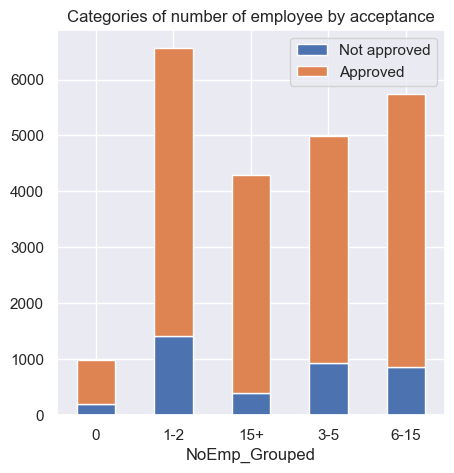

In [88]:
df.groupby(['NoEmp_Grouped', 'Accept']).size().unstack(['Accept']).plot(kind='bar', stacked=True,rot=0, subplots=False, figsize=(5,5))
a_labels = ['Not approved', 'Approved']
plt.legend(labels=a_labels)
plt.title('Categories of number of employee by acceptance')
plt.show()

Parece que la probabilidad de que le aprueben un préstamo aumenta con el número de empleados.

/Users/lhaemmerli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


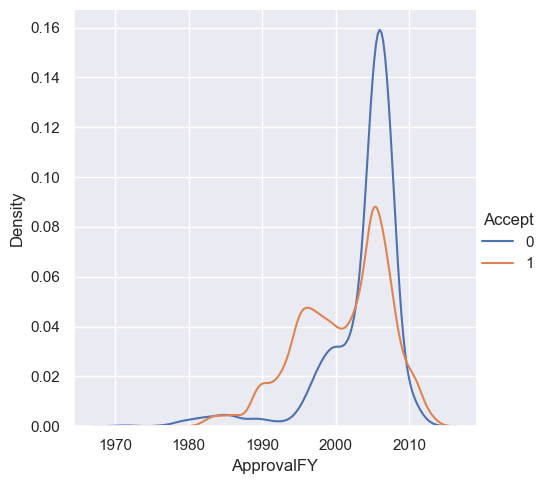

In [68]:
sns.FacetGrid(df, hue="Accept", height=5).map(sns.kdeplot, "ApprovalFY").add_legend()


No observamos diferencias significativas.

/Users/lhaemmerli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/c9/b28xz7yn0ws2fdbm2m15y7ww0000gn/T/ipykernel_30303/3064960465.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


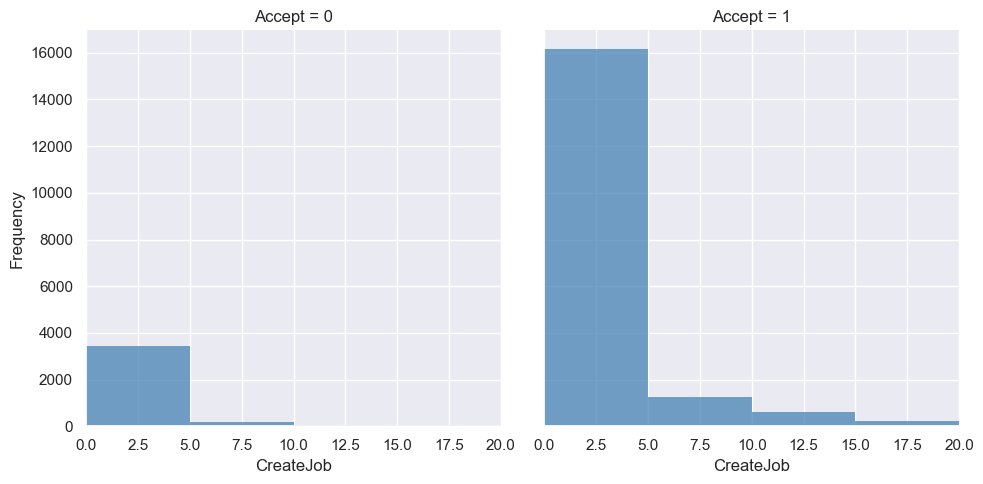

In [69]:
g = sns.FacetGrid(df, col='Accept', height=5, col_wrap=2)
g.map(sns.histplot, "CreateJob", color="steelblue", bins=range(0, int(df['CreateJob'].max()) + 5, 5), kde=False)
g.set(xlim=(0, 20))

g.set_axis_labels('CreateJob', 'Frequency')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'DisbursementGross by acceptance')

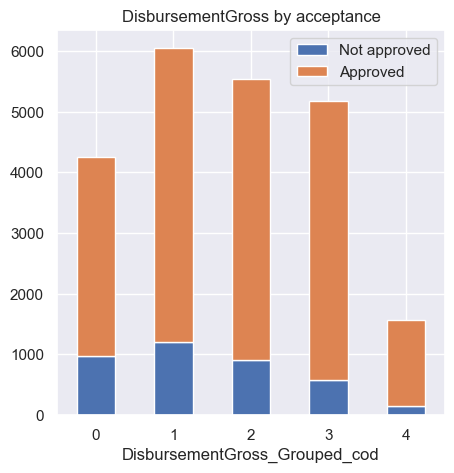

In [84]:
pclass_labels = ['First', 'Second', 'Third', 'Fourth']
a_labels = ['Not approved', 'Approved']
df.groupby(['DisbursementGross_Grouped_cod', 'Accept']).size().unstack(['Accept']).plot(kind='bar', stacked=True,rot=0, subplots=False, figsize=(5,5))

plt.legend(labels=a_labels)

plt.title('DisbursementGross by acceptance')

Como hemos visto antés, los DisbursementGross de la categoría 3,4 no son significativamente más rechazados que las otras categorías.

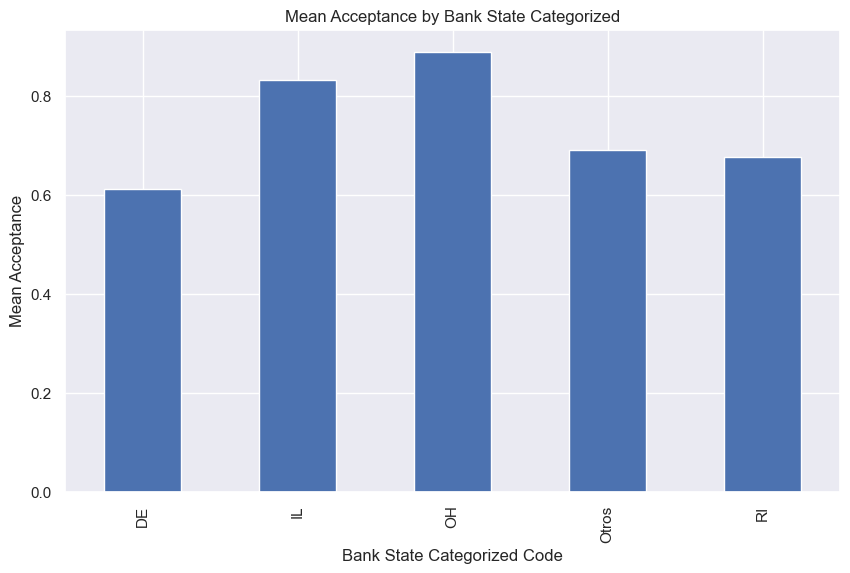

In [102]:
ax = df.groupby('BankState_Categorized_cod').Accept.mean().plot(kind='bar', figsize=(10, 6))

state_mapping = {0: 'DE', 1: 'IL', 2: 'OH', 3: 'Otros', 4: 'RI'}
ax.set_xticks(range(5)) 
ax.set_xticklabels([state_mapping[i] for i in range(5)])

plt.title('Mean Acceptance by Bank State Categorized')
plt.xlabel('Bank State Categorized Code')
plt.ylabel('Mean Acceptance')

# Show the plot
plt.show()



Podemos ver que en los estados de Illinois y Ohio, hay más probabilidad de que se acepte que en los otros estados.

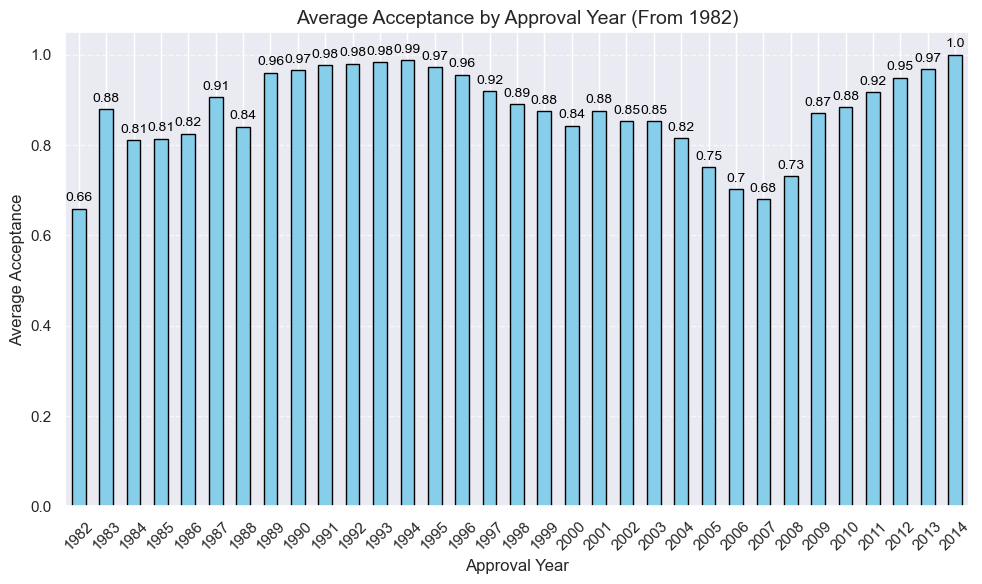

In [112]:
ax = df[df['ApprovalFY'] >= 1982].groupby('ApprovalFY').Accept.mean().plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

for i, v in enumerate(df[df['ApprovalFY'] >= 1982].groupby('ApprovalFY').Accept.mean()):
    ax.text(i, v + 0.01, round(v, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Acceptance by Approval Year (From 1982)', fontsize=14)
plt.xlabel('Approval Year', fontsize=12)
plt.ylabel('Average Acceptance', fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Los años 2005 a 2008 estuvieron marcados por una combinación de factores económicos negativos, como la crisis de las hipotecas de alto riesgo, la subida de los tipos de interés y el endurecimiento de las políticas crediticias en respuesta a la incertidumbre económica. Estos factores contribuyeron a una caída significativa de la contratación de préstamos durante este periodo.